## subplot()

In [2]:
import matplotlib.pyplot as plt ##plt is alias 
import numpy as np
import pandas as pd

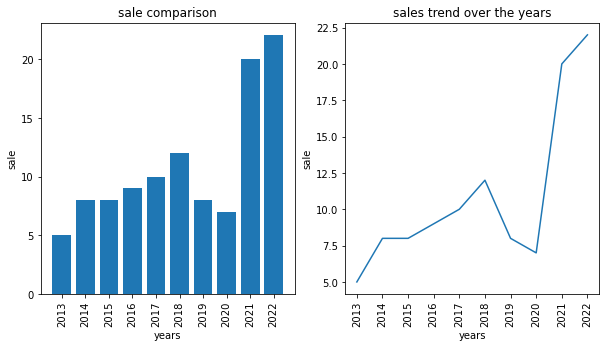

In [5]:
year=["2013","2014","2015","2016","2017","2018","2019","2020","2021","2022"]
online_sale=[5,8,8,9,10,12,8,7,20,22]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)  ## 1 is how many rows we need, 2 is how many plots we need and 1 is index
plt.bar(year,online_sale)
plt.xlabel("years")
plt.ylabel("sale")
plt.title("sale comparison")
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.plot(year,online_sale)
plt.xlabel("years")
plt.ylabel("sale")
plt.title("sales trend over the years")
plt.xticks(rotation=90)
plt.show()


C:\Users\rupan\AppData\Local\Temp\ipykernel_17240\1400439930.py:17: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(a,1/np.sin(a))


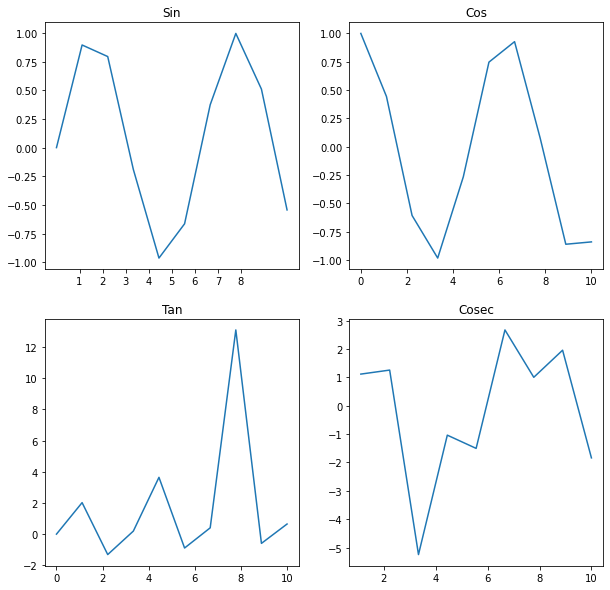

In [8]:
a=np.linspace(0,10,10)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)  # we need 2 rows and 2 columns and 1 is position
plt.plot(a,np.sin(a))
plt.title("Sin")
plt.xticks([1,2,3,4,5,6,7,8]) #giving ticks according to need

plt.subplot(2,2,2)
plt.plot(a,np.cos(a))
plt.title("Cos")

plt.subplot(2,2,3)
plt.plot(a,np.tan(a))
plt.title("Tan")

plt.subplot(2,2,4)
plt.plot(a,1/np.sin(a))
plt.title("Cosec")


plt.show()



# Boxplot()

Usage:
- To detect outliers in data
- tells 5 number summary (describe tells this)
- boxplot of matplotlib tells univariate analysis only while seaborn boxplot is used for multivariate also
- only works for Numeric data 

## Outliers : extreme values

Handle the outliers because it will create problem later

Outliers detection techniques:
    
    - z-score : when to use : when data is normally distributed
    - boxplot : when data is skewed(not normally distributed)
    - percentile based : rarely used 

In [9]:
import seaborn as sns
tips=sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


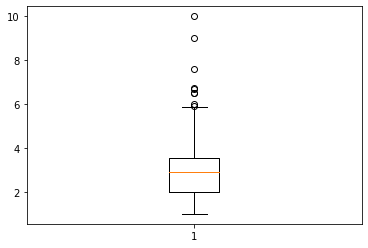

In [11]:
plt.boxplot(tips["tip"]);  ## outlier detection

## outliers are directly proportional to skewness

In [14]:
tips["tip"].median()

2.9

### plotting skewness graphical

## Detection Method 2 : Distplot()

C:\Users\rupan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

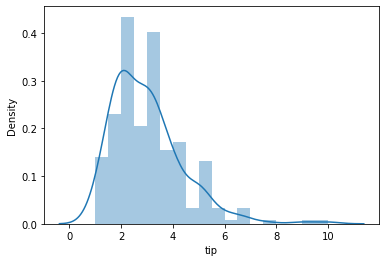

In [16]:
sns.distplot(tips["tip"])

In [17]:
tips["tip"].skew()  ## checking skewness mathematically
## if skewness is > 0 then right skewed and if skewness is < 0 then left skewed

1.4654510370979401

## Finding Limits Manually()

In [18]:
tips["tip"].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [19]:
p25=tips["tip"].quantile(0.25)
p25

2.0

In [20]:
p75=tips["tip"].quantile(0.75)
p75

3.5625

In [21]:
IQR=p75-p25  ##(Q3-Q1)
IQR

1.5625

In [22]:
upper_limit=p75+1.5*IQR  ##Q3+1.5*IQR 
lower_limit=p25-1.5*IQR ##Q1-1.5*IQR 
print(upper_limit)
print(lower_limit)

5.90625
-0.34375


### Insights: after 5.9 and -0.34 will be considered as outliers

### Finding outliers

In [25]:
tips[tips["tip"]> upper_limit]  ## tip data which is having upper outliers

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3


In [24]:
len(tips[tips["tip"]> upper_limit])

9

In [27]:
tips[tips["tip"] < lower_limit]  ## there is no lower outliers in the data that's why empty

,total_bill,tip,sex,smoker,day,time,size


## How to handle outliers:

There are two methods:
    
    - 1. Trimming : delete outliers data, not recommended as info is lost
    - 2. Capping : data balance with upper limit or lower limit

### Trimming()

In [29]:
dff=tips[(tips["tip"]>lower_limit) & (tips["tip"]<upper_limit)]
dff

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
dff["tip"].skew()  ## skewness is less than before

0.5745852200074195

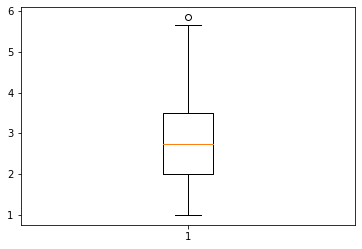

In [32]:
plt.boxplot(dff["tip"]);  ## only one outlier left

## Capping(): use the conditions(np.where concept)

In [45]:
new_df_cap=tips.copy() ## making a copy so that there is no change in original data
## create a copy for handling outlier in tips

In [46]:
'''new_df_cap["tip"]=np.where(new_df_cap["tip"] > upper_limit, upper_limit,
       np.where(new_df_cap["tip"] > lower_limit, lower_limit,
               new_df_cap["tip"]))  # for middle part of box which can be replaced with any one 

new_df_cap["tip"]'''

'new_df_cap["tip"]=np.where(new_df_cap["tip"] > upper_limit, upper_limit,\n       np.where(new_df_cap["tip"] > lower_limit, lower_limit,\n               new_df_cap["tip"]))  # for middle part of box which can be replaced with any one \n\nnew_df_cap["tip"]'

In [47]:
new_df_cap['tip'] = np.where(new_df_cap['tip'] > upper_limit, upper_limit, 
                                              np.where(new_df_cap['tip'] < lower_limit, lower_limit,
                                                       new_df_cap['tip'])) # for middle part of box which can be replaced with any one 



In [48]:
 new_df_cap["tip"].skew()

0.7067106704349628

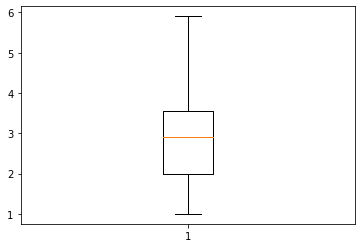

In [49]:
plt.boxplot(new_df_cap['tip']);
